#Arvayo Ruiz Edgar Alfonso - Aprendizaje Automatico II - 12-14-2022


##Proyecto Final

In [ ]:
# Importamos todas las librerias que se requieren

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import metrics 
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


In [ ]:
# Leemos nuestro dataset 

data = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

In [ ]:
# Presentamos nuestros primeros datos

data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [ ]:
# Vemos la información general de nuestro dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [ ]:
# Eliminamos todos los datos nulos

data = data.dropna()

In [ ]:
# Tomamos una muestra de los datos de 10000 datos

data = data.sample(n=10000)

In [ ]:
# Eliminamos las caracteristicas que no ocupamos

data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop(['ID'], axis=1)
data = data.drop(['Case Number'], axis=1) 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 225689 to 1122705
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10000 non-null  object 
 1   Block                 10000 non-null  object 
 2   IUCR                  10000 non-null  object 
 3   Primary Type          10000 non-null  object 
 4   Description           10000 non-null  object 
 5   Location Description  10000 non-null  object 
 6   Arrest                10000 non-null  bool   
 7   Domestic              10000 non-null  bool   
 8   Beat                  10000 non-null  int64  
 9   District              10000 non-null  float64
 10  Ward                  10000 non-null  float64
 11  Community Area        10000 non-null  float64
 12  FBI Code              10000 non-null  object 
 13  X Coordinate          10000 non-null  float64
 14  Y Coordinate          10000 non-null  float64
 15  Year        

In [ ]:
# Observamos el dataset una vez eliminados

data.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
225689,06/16/2012 10:15:00 PM,044XX S CALUMET AVE,1365,CRIMINAL TRESPASS,TO RESIDENCE,RESIDENCE,False,False,215,2.0,3.0,38.0,26,1179174.0,1875682.0,2012,02/04/2016 06:33:39 AM,41.814162,-87.618286,"(41.814162104, -87.618286116)"
163795,04/13/2012 08:41:00 PM,010XX W LAWRENCE AVE,0460,BATTERY,SIMPLE,APARTMENT,False,True,2024,20.0,46.0,3.0,08B,1168554.0,1932051.0,2012,02/04/2016 06:33:39 AM,41.969078,-87.655608,"(41.969078381, -87.65560801)"
827573,06/12/2014 05:20:00 PM,009XX W ADDISON ST,0870,THEFT,POCKET-PICKING,CTA TRAIN,False,False,1923,19.0,44.0,6.0,06,1169188.0,1924102.0,2014,02/04/2016 06:33:39 AM,41.947252,-87.653509,"(41.947252263, -87.65350869)"
359853,10/31/2012 04:30:00 PM,079XX S ELLIS AVE,0810,THEFT,OVER $500,RESIDENTIAL YARD (FRONT/BACK),False,False,624,6.0,8.0,44.0,06,1184273.0,1852467.0,2012,02/04/2016 06:33:39 AM,41.750340,-87.600309,"(41.750340162, -87.600308645)"
178902,04/28/2012 04:10:00 PM,076XX S RACINE AVE,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False,612,6.0,17.0,71.0,03,1169643.0,1854247.0,2012,02/04/2016 06:33:39 AM,41.755554,-87.653868,"(41.755554244, -87.653867946)"


In [ ]:
# Obtenemos todos los tipos de crimenes

Classes = data['Primary Type'].unique()
Classes

array(['CRIMINAL TRESPASS', 'BATTERY', 'THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'PUBLIC PEACE VIOLATION', 'NARCOTICS',
       'BURGLARY', 'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT',
       'OTHER OFFENSE', 'ASSAULT', 'PROSTITUTION', 'CRIM SEXUAL ASSAULT',
       'WEAPONS VIOLATION', 'LIQUOR LAW VIOLATION', 'ARSON',
       'INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE',
       'CONCEALED CARRY LICENSE VIOLATION', 'HOMICIDE',
       'OFFENSE INVOLVING CHILDREN', 'INTIMIDATION', 'GAMBLING',
       'STALKING', 'KIDNAPPING', 'PUBLIC INDECENCY', 'NON-CRIMINAL'],
      dtype=object)

In [ ]:
# Obtenemos las carateristicas que tomaremos como nuestra X

Features = ["IUCR", "Description", "FBI Code", "Domestic"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code', 'Domestic']


In [ ]:
# Factorizamos los daatos para mejor manipulación

data['Block'] = pd.factorize(data["Block"])[0]
data['IUCR'] = pd.factorize(data["IUCR"])[0]
data['Description'] = pd.factorize(data["Description"])[0]
data['Location Description'] = pd.factorize(data["Location Description"])[0]
data['FBI Code'] = pd.factorize(data["FBI Code"])[0]
data['Location'] = pd.factorize(data["Location"])[0] 

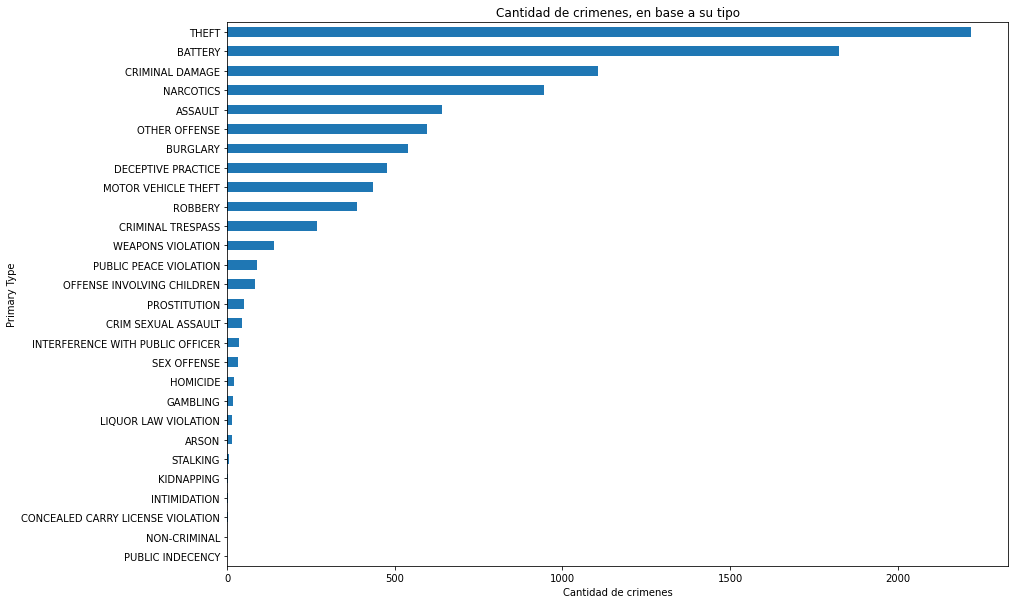

In [ ]:
# Graficamos la cantidad de crimenes a partir del tipo

plt.figure(figsize=(14,10))
plt.title('Cantidad de crimenes, en base a su tipo')
plt.ylabel('Tipo de Crimen')
plt.xlabel('Cantidad de crimenes')

data.groupby([data['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [ ]:
# Establecemos nuestro objetivo o nuestra Y

Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


In [ ]:
# Separamos los datos para entrenar y probar

x, y = train_test_split(data, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features] 
x2 = x[Target]  
y1 = y[Features] 
y2 = y[Target] 

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code', 'Domestic']
Target Class        :  Primary Type
Training Set Size   :  (8000, 20)
Test Set Size       :  (2000, 20)


## Red neuronal

In [ ]:
# Creamos un modelo de red neuronal y lo entrenamos

nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=1,
                         max_iter=1000                         
                        )

nn_model.fit(X=x1,
             y=x2)

result = nn_model.predict(y[Features]) 

In [ ]:
# Obtenemos sus estadisticas

ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')

print("========== Resultados (Red Neuronal) ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

========== Resultados (Red Neuronal) ==========
Accuracy    :  0.931
Recall      :  0.931
Precision   :  0.93192636097353
F1 Score    :  0.931


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Maquinas de soporte vectorial (SVM)

In [ ]:
# Creamos el modelo de soporte vectorial

clas = svm.SVC(kernel='linear')

In [ ]:
clas.fit(X=x1,y=x2)

SVC(kernel='linear')

In [ ]:
#Creamos las predicciones

Y_prediction = clas.predict(X=y1)
Y_prediction

array(['BURGLARY', 'OTHER OFFENSE', 'BATTERY', ..., 'ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS'], dtype=object)

In [ ]:
# Obtenemos las estadisticas del modelo

ac_sc = accuracy_score(y2, Y_prediction)
rc_sc = recall_score(y2, Y_prediction, average="weighted")
pr_sc = precision_score(y2, Y_prediction, average="weighted")
f1_sc = f1_score(y2, Y_prediction, average='micro')

print("========== Resultados (Maquina de sporte vectorial) ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

========== Resultados (Maquina de sporte vectorial) ==========
Accuracy    :  0.79
Recall      :  0.79
Precision   :  0.8214199964224924
F1 Score    :  0.79


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Ada Boost

In [ ]:
# Importar 'GridSearchCV', 'make_scorer' y cualquier otra biblioteca necesaria
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Inicializar el clasificador
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Cree la lista de parámetros que desea ajustar
parameters = {'n_estimators':[50, 120], 
              'learning_rate':[0.1, 0.5, 1.],
              'base_estimator__min_samples_split' : np.arange(2, 8, 2),
              'base_estimator__max_depth' : np.arange(1, 4, 1)
             }

# Hacer un objeto de puntuación fbeta_score
scorer = make_scorer(fbeta_score,beta=0.5)

# Realice una búsqueda de cuadrícula en el clasificador usando 'anotador' como método de puntuación
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_fit = grid_obj.fit(x1,x2)

# Obtener el estimador
best_clf = grid_fit.best_estimator_

# Realizar predicciones usando el no optimizado y el modelo
predictions = (clf.fit(x1, x2)).predict(y1)
best_predictions = best_clf.predict(y1)

# Informar las puntuaciones antes y después
print("Modelo no optimizado\n------")
print("Puntuación de precisión en los datos de prueba: {:.4f}".format(accuracy_score(y2, predictions)))
print("Puntuación F en los datos de prueba: {:.4f}".format(fbeta_score(y2, predictions, beta = 0.5, average='micro')))
print("\nModelo optimizado\n------")
print("Puntaje de precisión final en los datos de prueba: {:.4f}".format(accuracy_score(y2, best_predictions)))
print("Puntuación F final en los datos de prueba: {:.4f}".format(fbeta_score(y2, best_predictions, beta = 0.5, average='micro')))
print(best_clf)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py", line 1261, in fbeta_score
    _, _, f, _ = 

Modelo no optimizado
------
Puntuación de precisión en los datos de prueba: 0.9960
Puntuación F en los datos de prueba: 0.9960

Modelo optimizado
------
Puntaje de precisión final en los datos de prueba: 0.4005
Puntuación F final en los datos de prueba: 0.4005
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Entrena al modelo supervisado en el conjunto de entrenamiento
model = AdaBoostClassifier().fit(x1,x2)

# Extrae la importancia de las características
importances = model.feature_importances_
importances

array([0., 0., 1., 0.])